# Customer Segmentation

## Importing dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Loading and Exploring data

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## About the data:

1.   "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
2.    The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
3.    The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
4.    The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
5.    The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
6.     The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
7.     The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
8.     The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
9.      For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
10.     The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
data.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


The dataset doesn't have any null values

In [ ]:
data['Revenue'].value_counts()

,count
Revenue,
False,10422
True,1908


In [ ]:
data['Month'].value_counts()

,count
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288


In [ ]:
data['SpecialDay'].value_counts()

,count
SpecialDay,
0.0,11079
0.6,351
0.8,325
0.4,243
0.2,178
1.0,154


In [ ]:
data['Weekend'].value_counts()

,count
Weekend,
False,9462
True,2868


In [ ]:
data['Revenue'].value_counts()

,count
Revenue,
False,10422
True,1908


## Data Pre-processing

In [ ]:
one_hot  = OneHotEncoder(sparse_output=False)

In [ ]:
one_hot_data = pd.DataFrame(one_hot.fit_transform(data['VisitorType'].values.reshape(-1, 1)))

In [ ]:
one_hot_data

,0,1,2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
12325,0.0,0.0,1.0
12326,0.0,0.0,1.0
12327,0.0,0.0,1.0
12328,0.0,0.0,1.0


In [ ]:
data_final = pd.DataFrame(one_hot_data.values,columns = one_hot.get_feature_names_out(['VisitorType']))

In [ ]:
data_final

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
12325,0.0,0.0,1.0
12326,0.0,0.0,1.0
12327,0.0,0.0,1.0
12328,0.0,0.0,1.0


In [ ]:
label_cols = ['Weekend','Revenue']

In [ ]:
label_data = data[label_cols].astype(int)

In [ ]:
data_final[label_cols]=label_data

In [ ]:
data_final

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue
0,0.0,0.0,1.0,0,0
1,0.0,0.0,1.0,0,0
2,0.0,0.0,1.0,0,0
3,0.0,0.0,1.0,0,0
4,0.0,0.0,1.0,1,0
...,...,...,...,...,...
12325,0.0,0.0,1.0,1,0
12326,0.0,0.0,1.0,1,0
12327,0.0,0.0,1.0,1,0
12328,0.0,0.0,1.0,0,0


In [ ]:
month = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [ ]:
data['Month'] = data['Month'].replace(month)

<ipython-input-23-b9be36ea8a07>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Month'] = data['Month'].replace(month)


In [ ]:
scaler = MinMaxScaler()

In [ ]:
num_cols = [x for x in data.columns if x not in ['Weekend','Revenue','VisitorType']]

In [ ]:
data_final[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
data_final

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
0,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000000
1,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.0,0.142857,0.083333,0.000,0.052632
2,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.428571,0.000000,1.000,0.105263
3,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.0,0.285714,0.083333,0.125,0.157895
4,0.0,0.0,1.0,1,0,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.0,0.285714,0.166667,0.000,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.0,0.0,1.0,1,0,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,1.0,0.428571,0.416667,0.000,0.000000
12326,0.0,0.0,1.0,1,0,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.9,0.285714,0.083333,0.000,0.368421
12327,0.0,0.0,1.0,1,0,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,0.9,0.285714,0.083333,0.000,0.631579
12328,0.0,0.0,1.0,0,0,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.9,0.142857,0.083333,0.250,0.526316


## Segmentation using Clustersing

Let us find the value of an optimal number of clusters using the elbow method.

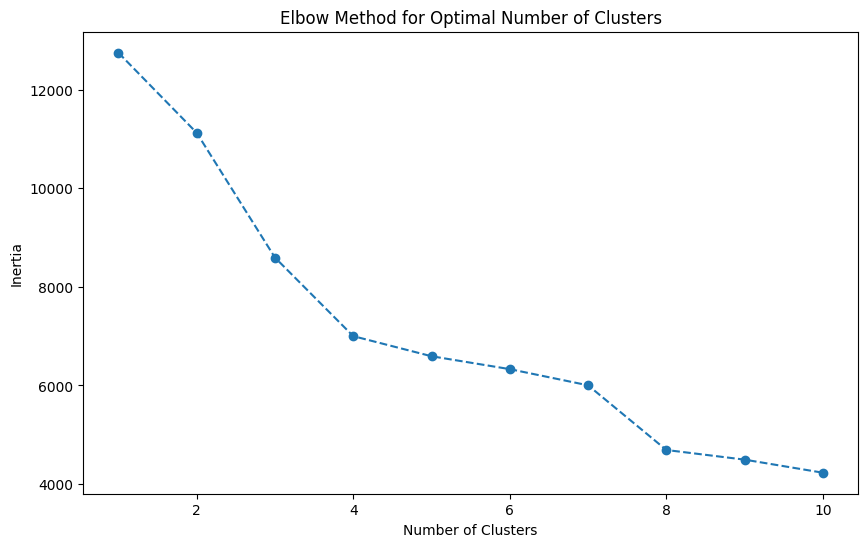

In [ ]:
inertias = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_final)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1,11), inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


Based on the above analysis, 4 seems to be a reasonable cluster count.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [ ]:
data_final['Cluster'] = kmeans.fit_predict(data_final)
print(data_final['Cluster'].value_counts())

Cluster
0    4315
2    3932
3    2389
1    1694
Name: count, dtype: int64


In [ ]:
data_final

,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,...,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Cluster
0,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.001418,...,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0
1,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.002837,...,0.000000,0.500000,0.000000,0.0,0.0,0.142857,0.083333,0.000,0.052632,0
2,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.001418,...,1.000000,1.000000,0.000000,0.0,0.0,0.428571,0.000000,1.000,0.105263,0
3,0.0,0.0,1.0,0,0,0.000000,0.000000,0.0,0.0,0.002837,...,0.250000,0.700000,0.000000,0.0,0.0,0.285714,0.083333,0.125,0.157895,0
4,0.0,0.0,1.0,1,0,0.000000,0.000000,0.0,0.0,0.014184,...,0.100000,0.250000,0.000000,0.0,0.0,0.285714,0.166667,0.000,0.157895,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.0,0.0,1.0,1,0,0.111111,0.042663,0.0,0.0,0.075177,...,0.035714,0.145153,0.033839,0.0,1.0,0.428571,0.416667,0.000,0.000000,3
12326,0.0,0.0,1.0,1,0,0.000000,0.000000,0.0,0.0,0.007092,...,0.000000,0.106667,0.000000,0.0,0.9,0.285714,0.083333,0.000,0.368421,3
12327,0.0,0.0,1.0,1,0,0.000000,0.000000,0.0,0.0,0.008511,...,0.416667,0.433333,0.000000,0.0,0.9,0.285714,0.083333,0.000,0.631579,3
12328,0.0,0.0,1.0,0,0,0.148148,0.022067,0.0,0.0,0.021277,...,0.000000,0.105263,0.000000,0.0,0.9,0.142857,0.083333,0.250,0.526316,2


## Customer Segments Analysis & Summary:

In [ ]:
cluster_summary=data_final.groupby('Cluster').describe()

In [ ]:
cluster_summary

VisitorType_New_Visitor                                     \
                          count mean  std  min  25%  50%  75%  max   
Cluster                                                              
0                        4315.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                        1694.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2                        3932.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                        2389.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

        VisitorType_Other            ... Region      TrafficType            \
                    count      mean  ...    75%  max       count      mean   
Cluster                              ...                                     
0                  4315.0  0.000232  ...  0.375  1.0      4315.0  0.159297   
1                  1694.0  0.000000  ...  0.500  1.0      1694.0  0.150376   
2                  3932.0  0.019583  ...  0.375  1.0      3932.0  0.168550   
3                  2389.0  0.002930  ...  0.375  1.0      2389.0  0.162059   

                                                           
              std  min       25%       50%       75%  max  
Cluster                                                    
0        0.203510  0.0  0.052632  0.105263  0.157895  1.0  
1        0.164833  0.0  0.052632  0.052632  0.210526  1.0  
2        0.238677  0.0  0.052632  0.052632  0.157895  1.0  
3        0.208995  0.0  0.052632  0.052632  0.157895  1.0  

[4 rows x 160 columns]

In [ ]:
cluster_summary['Revenue']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4315.0,0.030127,0.170958,0.0,0.0,0.0,0.0,1.0
1,1694.0,0.249115,0.432628,0.0,0.0,0.0,0.0,1.0
2,3932.0,0.244659,0.429940,0.0,0.0,0.0,0.0,1.0
3,2389.0,0.164923,0.371188,0.0,0.0,0.0,0.0,1.0


In [ ]:
cluster_summary['BounceRates']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4315.0,0.184664,0.315299,0.0,0.0,0.038337,0.175955,1.0
1,1694.0,0.026306,0.131558,0.0,0.0,0.000000,0.000000,1.0
2,3932.0,0.070510,0.160538,0.0,0.0,0.020000,0.066908,1.0
3,2389.0,0.104422,0.227021,0.0,0.0,0.025000,0.083333,1.0


In [ ]:
cluster_summary['ExitRates']

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,4315.0,0.302924,0.298594,0.0,0.096837,0.183333,0.375000,1.0
1,1694.0,0.103403,0.143635,0.0,0.034483,0.066667,0.123457,1.0
2,3932.0,0.173219,0.176401,0.0,0.073463,0.120220,0.200000,1.0
3,2389.0,0.205969,0.228351,0.0,0.075000,0.125000,0.233333,1.0


Based on the above analysis, we name the segments as follows:


1.   Segment 0 needs significant improvements to reduce bounce and exit rates.
2.   Segment 1 is the most valuable segment, with high engagement and conversions.
3.   segment 2 is promising but could benefit from enhanced user flow to reduce exit rates further.
4.   Segment 3 shows potential but requires a focus on improving conversions and engagement.







Let's visualize the customer segments.

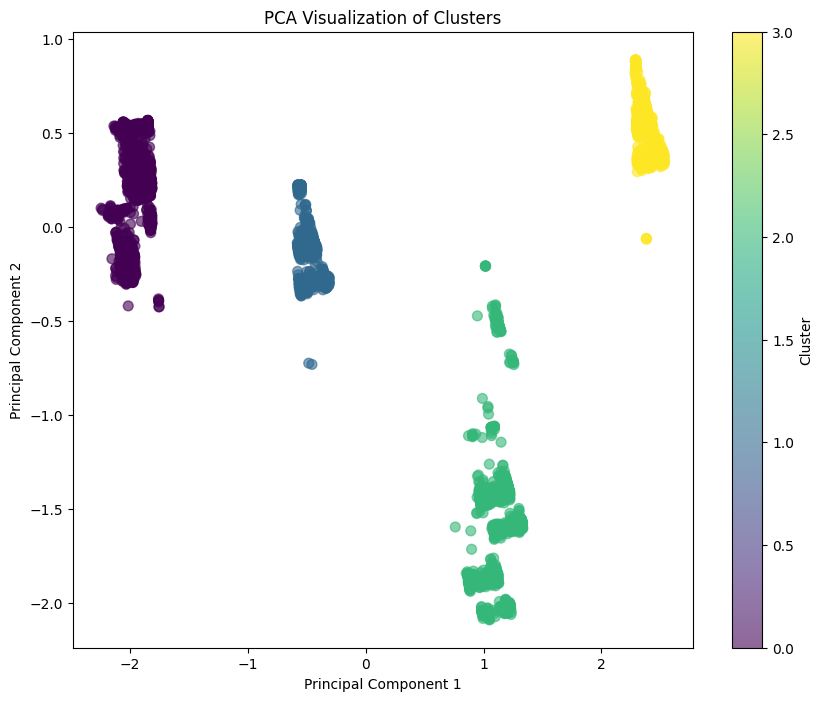

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_final)

# Add PCA results to the dataframe
data_final['PCA1'] = pca_result[:, 0]
data_final['PCA2'] = pca_result[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data_final['PCA1'], data_final['PCA2'], c=kmeans.labels_, cmap='viridis', alpha=0.6, s=50)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()